# Aufgabe 33


### a)

#### Gauß: $P(x)=\frac{1}{\sqrt{2 \pi \sigma^2}}e^{\frac{-(x-\mu)^2}{2 \sigma^2}}$

#### Poisson: $P(x) \approx\frac{1}{\sqrt{2 \pi \lambda}}e^{\frac{-(x-\lambda)^2}{2 \lambda}} \text{ mit } \lambda  \ge 30, \lambda= \mu = \sigma^2$ 

### b)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
np.random.seed(1337)

In [2]:
def ktest(X, Y, alpha):
    n=np.sum(X)
    m=np.sum(Y)

    FX=np.cumsum(X)/n
    FY=np.cumsum(Y)/m      
    
    d = np.max(np.abs(FX-FY)) #maximale Abstand
    #print(d)
    K_alpha = np.sqrt(np.log(2/alpha)/2)
    #print(K_alpha)
    passed = True
    
    #Überprüfung der Hypothese
    if np.sqrt((n*m)/(n+m))*d <= K_alpha : 
        return True 
    else:
        return False 



### c) + d)

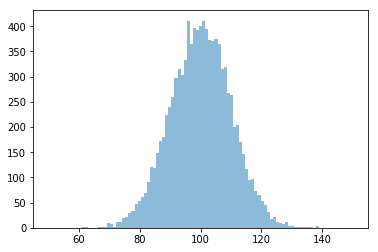

In [3]:
my=100
sig=10
normal = np.random.normal(100, 10, 10000)
normal.astype(int)
   
normal = np.delete(normal, np.where(normal < my-5*sig))
normal = np.delete(normal, np.where(normal > my+5*sig))


normal_bins = np.histogram(normal, bins=np.linspace(my-5*sig,my+5*sig,100))


plt.hist(normal, bins=np.linspace(my-5*sig,my+5*sig,100), alpha=0.5) 
plt.show()

In [4]:
for alpha in [0.05, 0.025, 0.01]:
    for lam in np.linspace(30, 100, 10000):
        pois=np.random.poisson(lam, 10000)
        
        pois=np.delete(pois, np.where(pois < my-5*sig))
        pois=np.delete(pois, np.where(pois > my+5*sig))
        
        poisson_bins = np.histogram(pois, bins=np.linspace(my-5*sig,my+5*sig,100))
        
        if ktest(poisson_bins[0], normal_bins[0], alpha) == True:
            print("alpha = ", alpha, " : Für den Test sind die Verteilungen ab Lambda = ", lam, "ununterscheidbar. \n" )
            break

alpha =  0.05  : Für den Test sind die Verteilungen ab Lambda =  99.62196219621963 ununterscheidbar. 

alpha =  0.025  : Für den Test sind die Verteilungen ab Lambda =  30.11201120112011 ununterscheidbar. 

alpha =  0.01  : Für den Test sind die Verteilungen ab Lambda =  30.042004200420042 ununterscheidbar. 

